### Uncover the factors that lead to employee attrition and explore important questions such as:
#### 1. Show me a breakdown of distance from home by job role and attrition.
#### 2. Compare average monthly income by education and attrition.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
attrition = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In this analysis we have a set of predefined questions that are aimed at finding out relationships between Multiple columns.
We have identified our columns as 
* DistanceFromHome
* Education 
* MonthlyIncome
* JobRole 
* Attrition

We have also found out their datatypes, but are unsure whether DistanceFromHome and Education are discrete or continous.


We perform a test to confirm this by finding the number of unique values per column and comparing them with the total number of entries(rows)

In [6]:
attrition.DistanceFromHome.nunique()

29

In [7]:
attrition['Education'].nunique()

5

In [8]:
attrition.MonthlyIncome.nunique()

1349

We can see that DistanceFromHome and Education have few unique values and are hence Discrete.

###### NB: Numerical Discrete variables are also considered a form of Categorical variables

### QUESTION 1. Show me a breakdown of distance from home by job role and attrition.

One approach could be directly using groupby to look at the average distance from home according to jobroles and attrition

In [9]:
attrition.groupby(['Attrition', 'JobRole'])['DistanceFromHome'].mean()

Attrition  JobRole                  
No         Healthcare Representative     9.204918
           Human Resources               6.600000
           Laboratory Technician         9.329949
           Manager                       7.927835
           Manufacturing Director        9.533333
           Research Director             8.474359
           Research Scientist            8.869388
           Sales Executive               9.026022
           Sales Representative          9.000000
Yes        Healthcare Representative    17.666667
           Human Resources              13.416667
           Laboratory Technician         9.661290
           Manager                      10.000000
           Manufacturing Director        8.800000
           Research Director             7.000000
           Research Scientist            9.765957
           Sales Executive              12.649123
           Sales Representative          8.151515
Name: DistanceFromHome, dtype: float64

We can also make our table more presentable by calling in unstack and resetting the index

In [10]:
attrition.groupby([ 'JobRole' ,'Attrition'])['DistanceFromHome'].mean().unstack().reset_index()

Attrition,JobRole,No,Yes
0,Healthcare Representative,9.204918,17.666667
1,Human Resources,6.600000,13.416667
2,Laboratory Technician,9.329949,9.661290
3,Manager,7.927835,10.000000
4,Manufacturing Director,9.533333,8.800000
5,Research Director,8.474359,7.000000
6,Research Scientist,8.869388,9.765957
7,Sales Executive,9.026022,12.649123
8,Sales Representative,9.000000,8.151515


A Seaborn barplot can also work to create the same breakdown in visual format

<AxesSubplot:xlabel='JobRole', ylabel='DistanceFromHome'>

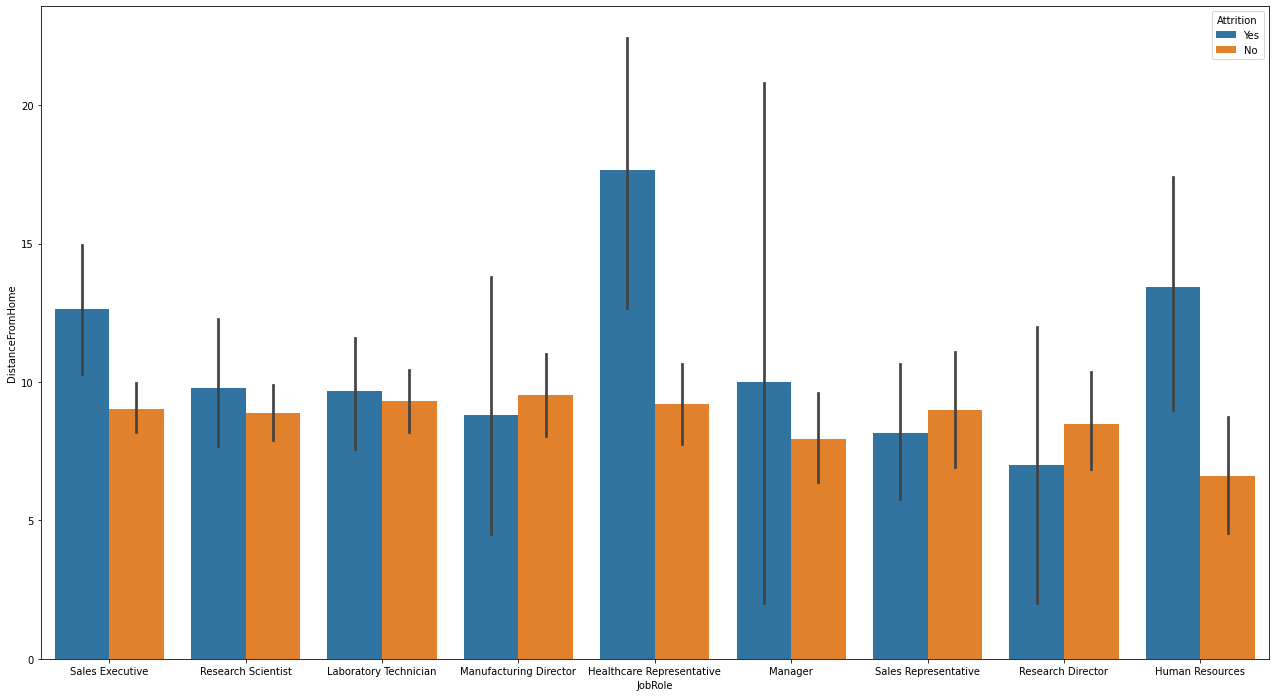

In [11]:
#plt.gcf().set_size_inches(22, 12, forward=True)
plt.figure(figsize = (22, 12))
sns.barplot(x = 'JobRole', y = 'DistanceFromHome', data = attrition, hue = 'Attrition')

We can clearly see that HealthCare Representatives, Human Resource personnel and Sales Executives have the largest distance from home and are leaving the company

However we may want to find out how many people leave the company per role and per distance

In [12]:
attrition.groupby(['DistanceFromHome', 'JobRole', 'Attrition'])['Attrition'].count().unstack().reset_index()

Attrition,DistanceFromHome,JobRole,No,Yes
0,1,Healthcare Representative,23.0,NaN
1,1,Human Resources,8.0,1.0
2,1,Laboratory Technician,27.0,4.0
3,1,Manager,13.0,NaN
4,1,Manufacturing Director,23.0,1.0
...,...,...,...,...
219,29,Manager,3.0,1.0
220,29,Manufacturing Director,4.0,NaN
221,29,Research Scientist,3.0,1.0
222,29,Sales Executive,4.0,1.0


Alternatively, using the dummy endoding technique within the pandas library:

In [13]:
attrition_dummies = pd.get_dummies(attrition[['DistanceFromHome', 'JobRole', 'Attrition']], columns = ['Attrition'])
attrition_dummies.groupby(['DistanceFromHome', 'JobRole']).count()

Attrition_No  Attrition_Yes
DistanceFromHome JobRole                                               
1                Healthcare Representative            23             23
                 Human Resources                       9              9
                 Laboratory Technician                31             31
                 Manager                              13             13
                 Manufacturing Director               24             24
...                                                  ...            ...
29               Manager                               4              4
                 Manufacturing Director                4              4
                 Research Scientist                    4              4
                 Sales Executive                       5              5
                 Sales Representative                  1              1

[224 rows x 2 columns]

### 2. Compare average monthly income by education and attrition.

In [14]:
attrition.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().unstack().reset_index()

Attrition,Education,No,Yes
0,1,5926.129496,4360.161290
1,2,6586.058824,4282.545455
2,3,6882.919662,4770.242424
3,4,7087.814706,5335.155172
4,5,8559.906977,5850.200000


<AxesSubplot:xlabel='Education', ylabel='MonthlyIncome'>

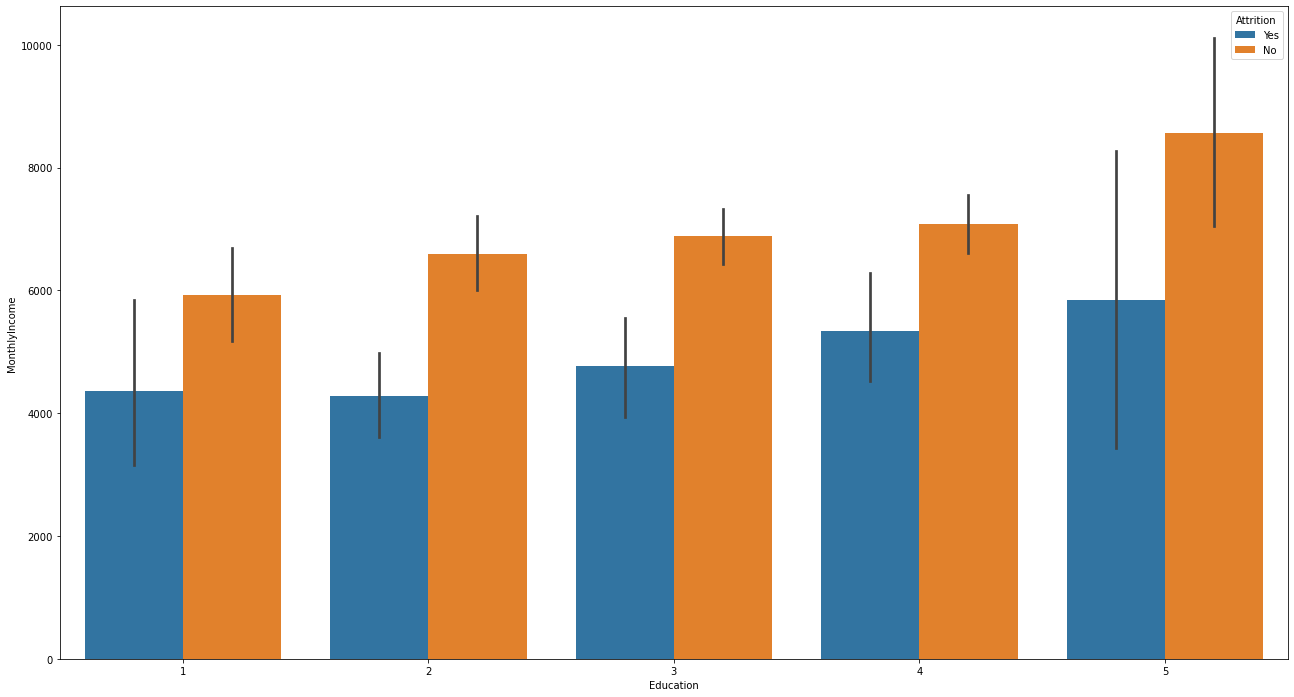

In [15]:
plt.figure(figsize = (22, 12))
sns.barplot(x = 'Education', y = 'MonthlyIncome', data = attrition, hue = 'Attrition')

People with generally lower average incomes leave per education level while those with higher monthly incomes remain per education level
